В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [68]:
cars_df = pd.read_csv(r'D:\ml_course\Модуль 2. Навчання з учителем\dataframes\cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [69]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

Signature:
pd.DataFrame.info(
    self,
    verbose: 'bool | None' = None,
    buf: 'WriteBuffer[str] | None' = None,
    max_cols: 'int | None' = None,
    memory_usage: 'bool | str | None' = None,
    show_counts: 'bool | None' = None,
) -> 'None'
Docstring:
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

Parameters
----------
verbose : bool, optional
    Whether to print the full summary. By default, the setting in
    ``pandas.options.display.max_info_columns`` is followed.
buf : writable buffer, defaults to sys.stdout
    Where to send the output. By default, the output is printed to
    sys.stdout. Pass a writable buffer if you need to further process
    the output.
max_cols : int, optional
    When to switch from the verbose to the truncated output. If the
    DataFrame has more than `max_cols` columns, the truncated output
    is used. By default, the setting in


In [70]:
cars_df.columns = cars_df.columns.str.lower()
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   car_id             100 non-null    int64 
 1   brand              100 non-null    object
 2   model              100 non-null    object
 3   year               100 non-null    int64 
 4   kilometers_driven  100 non-null    int64 
 5   fuel_type          100 non-null    object
 6   transmission       100 non-null    object
 7   owner_type         100 non-null    object
 8   mileage            100 non-null    int64 
 9   engine             100 non-null    int64 
 10  power              100 non-null    int64 
 11  seats              100 non-null    int64 
 12  price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [71]:
cat_columns = ['brand', 'model', 'fuel_type', 'transmission', 'owner_type']

In [72]:
cars_df[cat_columns].apply(pd.Series.unique)

brand           [Toyota, Honda, Ford, Maruti, Hyundai, Tata, M...
model           [Corolla, Civic, Mustang, Swift, Sonata, Nexon...
fuel_type                                        [Petrol, Diesel]
transmission                                  [Manual, Automatic]
owner_type                                 [First, Second, Third]
dtype: object

In [73]:
cars_df[cat_columns].apply(pd.Series.nunique)

brand           11
model           58
fuel_type        2
transmission     2
owner_type       3
dtype: int64

### Висновок:
В наборі даних 8 числових і 5 категоріальних колонок з них:
- 2 бінарні які мають лише 2 значення (fuel_type, transmission)
- 2 мультикатегоріальні без відношення порядку (brand, model)
- 1 мультикатегоріальна колонка з відношенням порядку (owner_type: First < Second < Third)

car_id — ідентифікатор, не використовується як ознака при навчанні моделей

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [74]:
from sklearn.model_selection import train_test_split
X = cars_df.drop('price', axis=1)
y = cars_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
X_train.shape, X_test.shape

((80, 12), (20, 12))

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [75]:
cars_df.fuel_type.value_counts()

fuel_type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [76]:
cars_df.transmission.value_counts()

transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [77]:
fuel_type_codes = {'Petrol': 1, 'Diesel': 0}
X_train['fuel_type_code'] = X_train.fuel_type.map(fuel_type_codes)
X_test['fuel_type_code'] = X_test.fuel_type.map(fuel_type_codes)
transmission_codes = {'Automatic': 1, 'Manual': 0}
X_train['transmission_code'] = X_train.transmission.map(transmission_codes)
X_test['transmission_code'] = X_test.transmission.map(transmission_codes)

In [78]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['brand']])

one_hot_train = enc.transform(X_train[['brand']]).toarray()
one_hot_test = enc.transform(X_test[['brand']]).toarray()

X_train[enc.categories_[0]] = one_hot_train
X_test[enc.categories_[0]] = one_hot_test


In [79]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,car_id,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,car_id,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

In [80]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['owner_type']])

X_train['owner_type_codes'] = ordenc.transform(X_train[['owner_type']])
X_test['owner_type_codes'] = ordenc.transform(X_test[['owner_type']])

Очікуваний результат після трансформацій:

In [81]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,car_id,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,owner_type_codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,car_id,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,owner_type_codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [82]:
X_train.drop(cat_columns, axis=1, inplace=True)

In [83]:
X_test.drop(cat_columns, axis=1, inplace=True)

In [84]:
X_y_train = pd.concat([X_train, y_train], axis=1)


In [85]:
corr_matrix = X_y_train.corr()

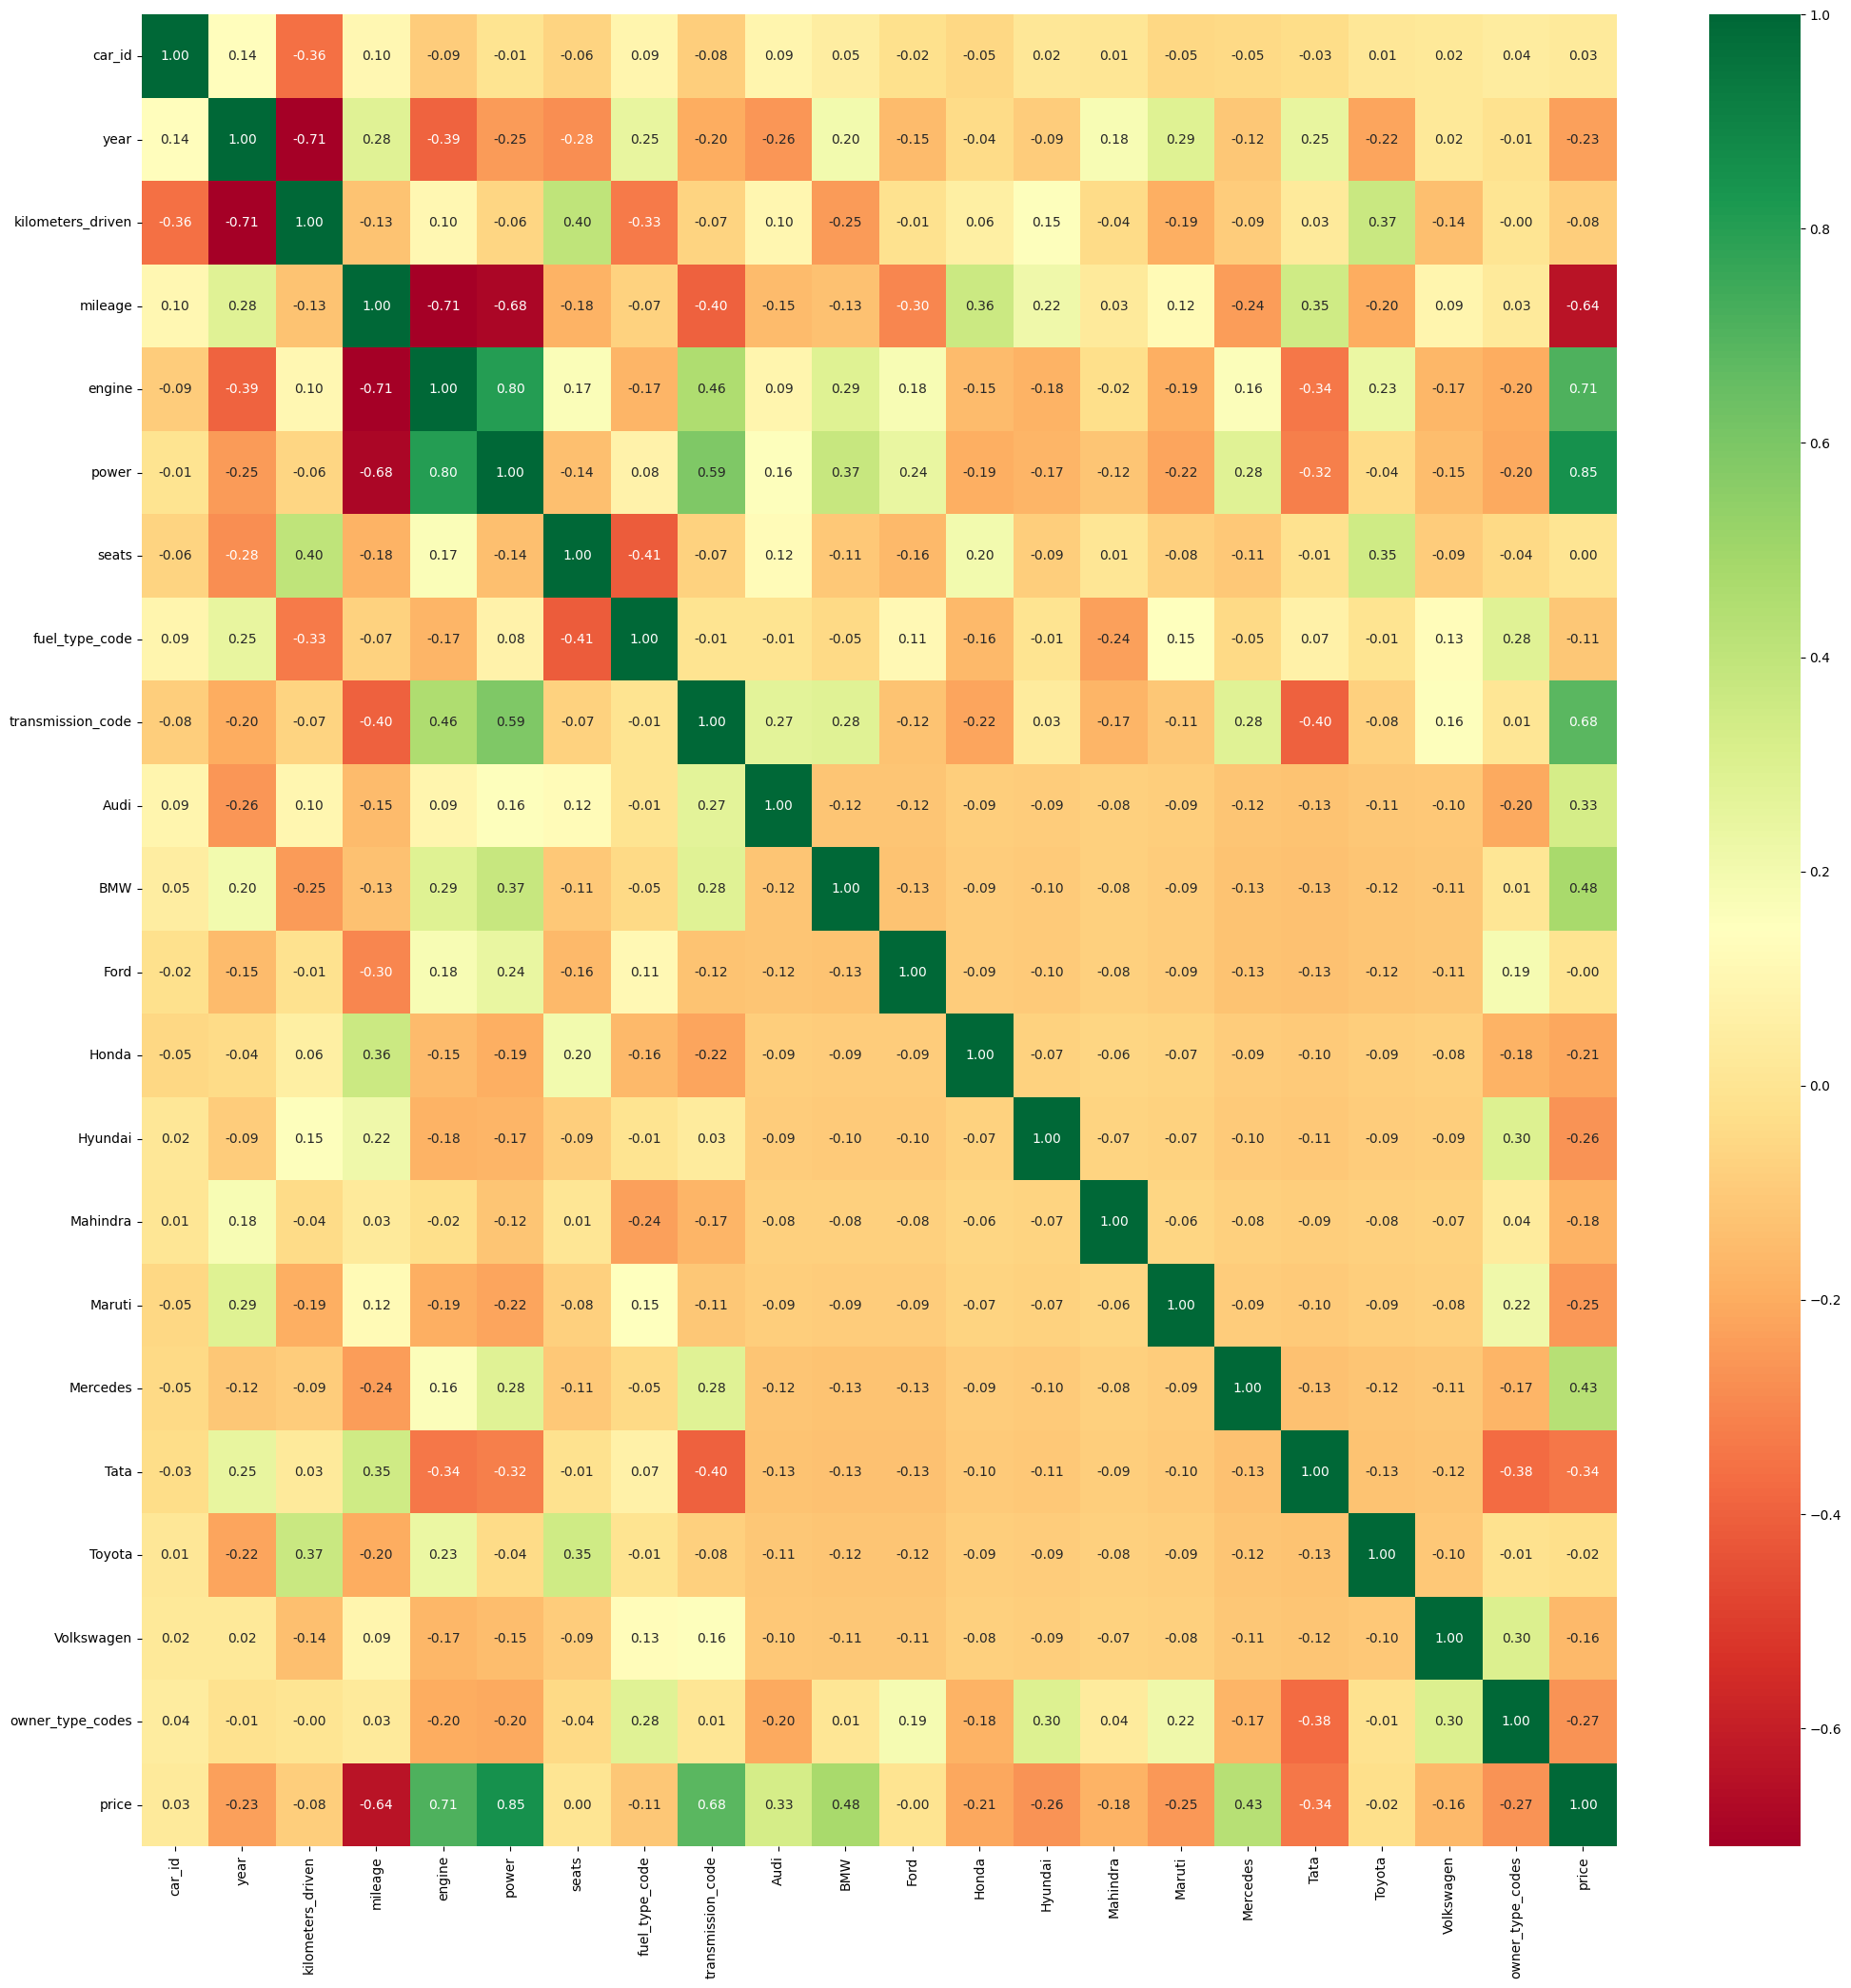

In [86]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_matrix, annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

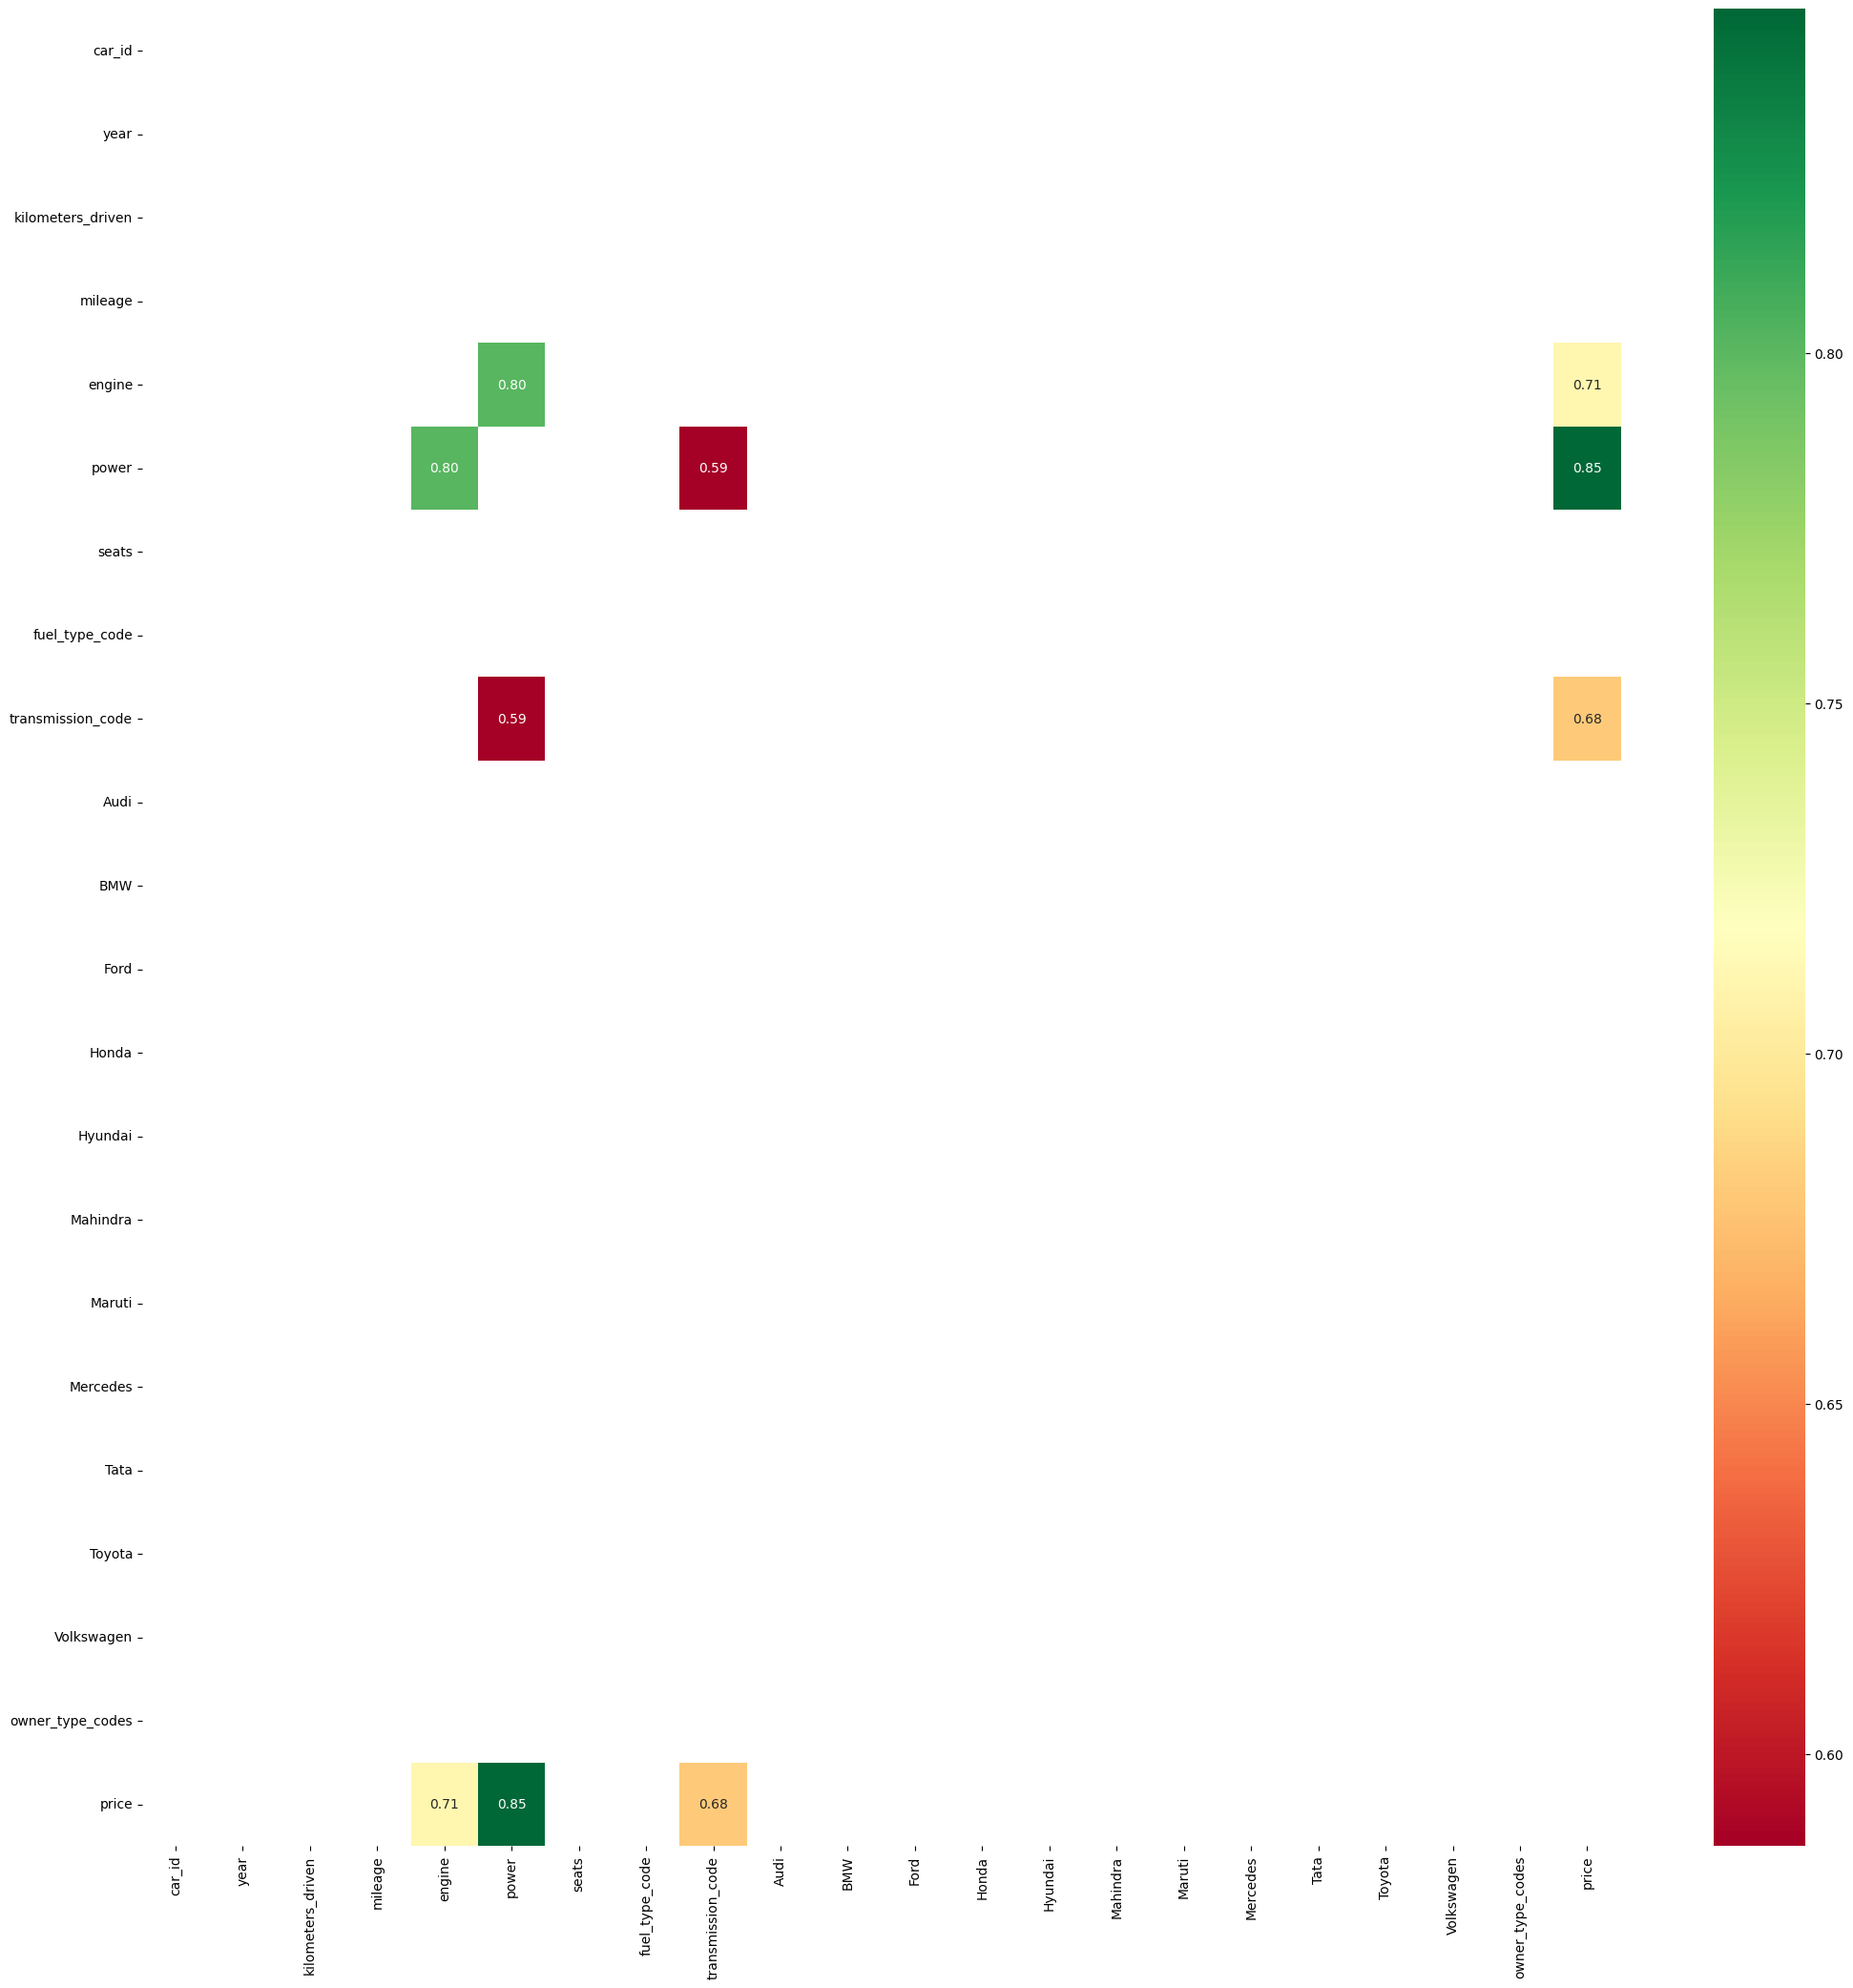

In [87]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_matrix[(corr_matrix >= 0.5) & (corr_matrix < 0.99)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [88]:
price_corr = corr_matrix['price']
price_corr = price_corr.drop('price')
strong_corr = price_corr[price_corr.abs() >= 0.5]
strong_corr = strong_corr.reindex(strong_corr.abs().sort_values(ascending=False).index)
strong_corr

power                0.849137
engine               0.710561
transmission_code    0.680731
mileage             -0.638404
Name: price, dtype: float64

#### Висновок:
З цільовою змінною price сильну кореляцію мають ознаки power, engine, transmission_code та mileage. Ознаки power, engine та transmission_code мають позитивну кореляцію з ціною, тоді як mileage має негативну кореляцію, що означає: більш економічні автомобілі, як правило, коштують дешевше.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [89]:
model = LinearRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
print(f'RMSE train: {rmse_train:.2f}')
print(f'RMSE test: {rmse_test:.2f}')

RMSE train: 210293.58
RMSE test: 258181.56


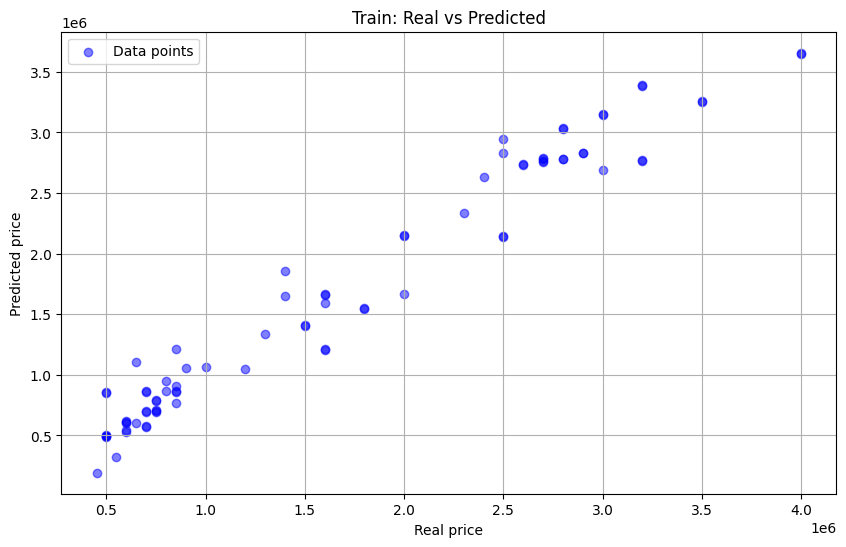

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Data points')
plt.xlabel("Real price")
plt.ylabel("Predicted price")
plt.title("Train: Real vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

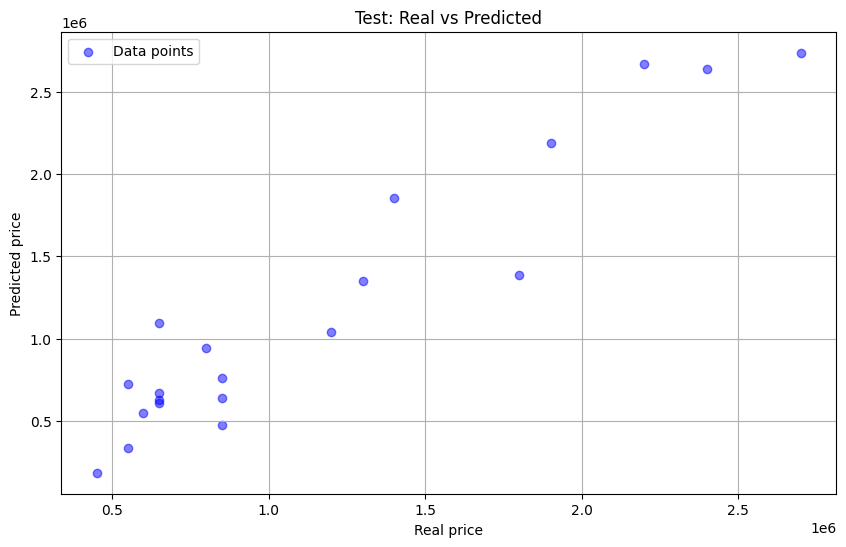

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Data points')
plt.xlabel("Real price")
plt.ylabel("Predicted price")
plt.title("Test: Real vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

#### Висновок:
Для тренувального набору точки на графіку розташовані ближче одна до одної, що означає меншу помилку передбачення. Для тестових даних розкид точок більший, що свідчить про гіршу якість передбачень на нових даних. І це також видно по RMSE у train він менший ніж у test. Модель вловлює залежність між ознаками та ціною, але не може точно передбачити всі значення.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [92]:
scaler = StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_model = LinearRegression().fit(scaled_X_train, y_train)

In [93]:
weights_df = pd.DataFrame({
    'feature': X_train.columns,
    'weight': scaled_model.coef_
    })
weights_df.sort_values('weight', ascending=False)

,feature,weight
5,power,496769.214899
16,Mercedes,210048.781148
10,BMW,208407.313783
9,Audi,205600.147769
8,transmission_code,116693.768206
20,owner_type_codes,42344.952815
18,Toyota,15805.701511
0,car_id,5608.685421
6,seats,-2148.924549
1,year,-8765.645714


#### Висновок: 
Після масштабування стало можливим порівняти вплив різних ознак між собою. Найбільший позитивний вплив на ціну має потужність двигуна power, що є логічним. Деякі змінні, зокрема engine, мають негативний коефіцієнт, що може бути повʼязано з кореляцією між ознаками, між engine та power. Це означає, що модель оцінює вплив кожної змінної за умови фіксації інших, що не завжди відповідає реальним умовам. Ознака mileage має негативний вплив, тобто зі зростанням витрати пального ціна автомобіля зменшується. Також автоматична коробка передач позитивно впливає на ціну порівняно з механічною.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [105]:
Y_sm = y_train.reset_index(drop=True)
X_sm = pd.DataFrame(scaled_X_train, columns=X_train.columns)
X_sm = sm.add_constant(X_sm)
stat_model = sm.OLS(Y_sm, X_sm)
results = stat_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           2.01e-33
Time:                        20:34:22   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.74e+0

#### Висновок:
За результатами OLS-регресії статистично значущими на рівні значущості 0.05 є такі ознаки: mileage, power, fuel_type_code, transmission_code, а також бренд-ознаки Audi, BMW, Ford, Hyundai, Mahindra, Maruti, Mercedes, Volkswagen. Інші змінні не є статистично значущими, оскільки їх p-value перевищує 0.05.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [106]:
significant = ['mileage', 'power', 'fuel_type_code', 'transmission_code',
    'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra',
    'Maruti', 'Mercedes', 'Volkswagen']
X_sm_sig = X_sm[ ['const'] + significant]
model_sig = sm.OLS(Y_sm, X_sm_sig).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           4.12e-39
Time:                        20:47:16   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+0

#### Висновок:
Після відбору лише статистично значущих ознак значення R2 та Adjusted R2 незначно зменшились з 0.959 до 0.951 та з 0.945 до 0.943 відповідно. Це свідчить про те, що видалені ознаки майже не впливали на якість моделі, а спрощена модель зберігає високу пояснювальну здатність. Для брендів Ford та Maruti рівень статистичної значущості зменшився після скорочення моделі, що свідчить про слабкий вплив цих ознак на ціну.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [107]:
significant_2 = ['mileage', 'power', 'fuel_type_code', 'transmission_code',
    'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra',
    'Maruti', 'Mercedes', 'Volkswagen', 'kilometers_driven', 'Honda', 'Tata']
X_sm_sig_2 = X_sm[ ['const'] + significant_2]
model_sig_2 = sm.OLS(Y_sm, X_sm_sig_2).fit()
print(model_sig_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           4.85e-38
Time:                        21:02:43   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

#### Висновок:
У моделі з помʼякшеним критерієм відбору ознак p-value менше 0.25 значення R2 та Adjusted R2 практично не змінились порівняно з повною моделлю, але всі коефіцієнти стали статистично значущими. Це свідчить про стабільнішу та кращу модель. Для подальшого використання краще обрати модель із завдання 10.